## Изучение данных.

Импортируем все необходимые библии или те которые могут понадобиться.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly
import plotly.graph_objs as go
import plotly.io as pio
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from tqdm import tqdm
tqdm.pandas(desc="Example Desc")
pio.renderers.default='notebook'
init_notebook_mode(connected=True)

/opt/conda/lib/python3.7/site-packages/tqdm/std.py:703: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



Прочитатем файлы

In [2]:
user = pd.read_csv('/datasets/users.csv')
call = pd.read_csv('/datasets/calls.csv')
mess = pd.read_csv('/datasets/messages.csv')
inet = pd.read_csv('/datasets/internet.csv')
rate = pd.read_csv('/datasets/tariffs.csv')

In [3]:
user.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
call.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
mess.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
inet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
rate.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [10]:
mess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
inet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [12]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


# Вывод
После прочтения всех таблиц мы видим:
- пустые значения. Нужно изучить их и, что-то с ними сделать.
- время и дату. Перевести в правильный формат если это необходимо.
- и есть странный столбец **"Unnamed: 0"** в датасете **inet**. Мое предположение, что это дублирование индексов.
- По типам данных нужно заменить время и дату

## Пердобработка данных.

### Пропуски

In [13]:
user.isna().mean()

user_id       0.000
age           0.000
churn_date    0.924
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64

В таблице "user" 92% данных имеют пропуски. В описании сказано, что если есть пропуск то на момент выгрузки даных тариф еще действовал. Заменим тип данных и пропуски на последнюю дату, что будет говорить о том, что тарифом еще пользуются.

In [14]:
user.tail()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


In [15]:
user.duplicated().sum()

0

In [16]:
call.duplicated().sum()

0

In [17]:
mess.duplicated().sum()

0

In [18]:
inet.duplicated().sum()

0

In [19]:
rate.duplicated().sum()

0

In [20]:
def data(df, table):
    df[table] = pd.to_datetime(df[table], format='%Y-%m-%dT%H:%M:%S')

In [21]:
data(user, 'churn_date')
data(user, 'reg_date')

In [22]:
user['churn_date'] = user['churn_date'].fillna(user.churn_date.max())

После проверки на дубликаты, уникальные значения в столбцах и пустые значения, меняем тип данных в столбцах с датой, так как в других столбцах пролем нет.

In [23]:
data(call, 'call_date')
data(mess, 'message_date')
data(inet, 'session_date')

Теперь о странном столбце "Unnamed: 0" в таблице "inet". Это дублирование индексов. Можно конечно его переименовать, малоли пригодиться, а можно удалить так как потом можно будет его снова сделать если надо. Удалим.

In [24]:
inet = inet.drop('Unnamed: 0', axis=1)

**Компания всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.**. 

Округлим столбцы минут и мегaбайтов до большего целого, а раз у нас целые, тогда избавимся от точки и изменим тип данных.

In [25]:
call['duration'] = np.ceil(call.duration)

In [26]:
call['duration'] = call.duration.astype('int')

In [27]:
call.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [28]:
inet['mb_used'] = np.ceil(inet.mb_used)

In [29]:
inet['mb_used'] = inet.mb_used.astype('int')

In [30]:
inet.head()

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


In [31]:
rate

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


# Вывод 
- Избавились от пропущенных значений заменим их на максимальное т.к. тарифом еще пользуются.
- Заменил тип данных в столбцах с датой.
- Удалил столбец "Unnamed: 0" в таблице "inet" так как он там пока не нужен.
- По поводу таблицы "call" и столбца "duration", в нем есть 0. Этот столбец показывает длительность в минутах и это могут быть пропущенные звонки, оставляю до лучших времен.
- Округлили значения минут и мегабайтов, т.к. компания округляет их для своей выгоды и поменяли тип данных на int.

#### Количество сделанных звонков и израсходованных минут разговора по месяцам;

Сделаем столбец по месяцам.

In [32]:
call['month'] = pd.DatetimeIndex(call['call_date']).month

In [33]:
call_stat_month = call.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count',
                                                                                           'sum'])
call_stat_month.columns = ['call_count', 'minutes_spent']

In [34]:
call_stat_month = call_stat_month.reset_index().merge(user[['user_id', 'tariff']], on='user_id',
                                                      how='inner')

In [35]:
call_stat_month

,user_id,month,call_count,minutes_spent,tariff
0,1000,5,22,159,ultra
1,1000,6,43,172,ultra
2,1000,7,47,340,ultra
3,1000,8,52,408,ultra
4,1000,9,58,466,ultra
...,...,...,...,...,...
3169,1498,10,41,247,smart
3170,1499,9,9,70,smart
3171,1499,10,68,449,smart
3172,1499,11,74,612,smart


#### Количество отправленных сообщений по месяцам;

In [36]:
mess['month'] = pd.DatetimeIndex(mess['message_date']).month
mess['index'] = mess.index

In [37]:
mess_stat_month = mess.pivot_table(index=['user_id', 'month'], values='index', aggfunc='count')
mess_stat_month.columns = ['mess_count']
mess_stat_month = mess_stat_month.reset_index().merge(user[['user_id', 'tariff']], on='user_id')

In [38]:
mess_stat_month

,user_id,month,mess_count,tariff
0,1000,5,22,ultra
1,1000,6,60,ultra
2,1000,7,75,ultra
3,1000,8,81,ultra
4,1000,9,57,ultra
...,...,...,...,...
2712,1498,10,42,smart
2713,1499,9,11,smart
2714,1499,10,48,smart
2715,1499,11,59,smart


#### Oбъем израсходованного интернет-трафика по месяцам;

In [39]:
inet['month'] = pd.DatetimeIndex(inet['session_date']).month

In [40]:
inet_stat_month = inet.pivot_table(index=['month', 'user_id'], values='mb_used', aggfunc='sum')
inet_stat_month.columns = ['sum_mb']
inet_stat_month = inet_stat_month.reset_index().merge(user[['user_id', 'tariff']], on='user_id')

In [41]:
inet_stat_month

,month,user_id,sum_mb,tariff
0,1,1005,2730,smart
1,2,1005,7394,smart
2,3,1005,11117,smart
3,4,1005,9365,smart
4,5,1005,7877,smart
...,...,...,...,...
3198,12,1398,18690,smart
3199,12,1406,11446,smart
3200,12,1434,15373,smart
3201,12,1445,16690,smart


#### Помесячная выручка с каждого пользователя.

In [42]:
rate

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [43]:
def revenue(df, table, tariff_value, over_value):
    '''
    Возвращает значение прибыли исходя из тарифного плана.
    df - нужная нам таблица
    table - нужный столбец со значениями
    tariff_value - нужный столбец со значением тарифа
    over_value - нужный столбец со значением тарифа сверх пакета
    
    '''
    tariff = df['tariff']
    min_spent = df[table]
    
    smart = rate[tariff_value][0]
    ultra = rate[tariff_value][1]
    
    over_smart = rate[over_value][0]
    over_ultra = rate[over_value][1]
    
    if tariff == 'smart':
        x = smart - min_spent
        if x < 0:
            x = x * over_smart
            x = abs(x)
            return x
        else:
            x = 0
            return x
    else:
        x = ultra - min_spent
        if x < 0:
            x = x * over_ultra
            x = abs(x)
            return x
        else:
            x = 0
            return x

In [44]:
call_stat_month['call_rub'] = call_stat_month.progress_apply(lambda x: revenue(x,
                                                                               'minutes_spent',
                                                                               'minutes_included',
                                                                               'rub_per_minute'),
                                                             axis=1)

Example Desc: 100%|██████████| 3174/3174 [00:00<00:00, 16691.41it/s]


In [45]:
mess_stat_month['mess_rub'] = mess_stat_month.progress_apply(lambda x: revenue(x,
                                                                               'mess_count',
                                                                               'messages_included',
                                                                               'rub_per_message'),
                                                             axis=1)

Example Desc: 100%|██████████| 2717/2717 [00:00<00:00, 15732.51it/s]


In [46]:
def inet_revenue(df):

    tariff = df['tariff']
    min_spent = df['sum_mb']
    
    smart = rate['mb_per_month_included'][0]
    ultra = rate['mb_per_month_included'][1]
    
    over_smart = rate['rub_per_gb'][0]
    over_ultra = rate['rub_per_gb'][1]
    
    if tariff == 'smart':
        x = smart - min_spent
        if x < 0:
            x = abs(x) / 1024
            x = x * over_smart
            return x
        else:
            x = 0
            return x
    else:
        x = ultra - min_spent
        if x < 0:
            x = abs(x) / 1024
            x = x * over_ultra
            return x
        else:
            x = 0
            return x

In [47]:
inet_stat_month['inet_rub'] = inet_stat_month.progress_apply(inet_revenue, axis=1)

Example Desc: 100%|██████████| 3203/3203 [00:00<00:00, 16759.38it/s]


Соеденяю в общую таблицу

In [48]:
csm = call_stat_month.set_index(['user_id', 'month'])

In [49]:
msm = mess_stat_month.set_index(['user_id', 'month'])

In [50]:
ism = inet_stat_month.set_index(['user_id', 'month'])

In [51]:
final_table = pd.concat([csm,msm,ism], axis=1).reset_index()

В финальной таблице есть пропуски.

In [52]:
final_table.isna().sum()

user_id            0
month              0
call_count        40
minutes_spent     40
tariff            40
call_rub          40
mess_count       497
tariff           497
mess_rub         497
sum_mb            11
tariff            11
inet_rub          11
dtype: int64

Видно, что пропуски есть в значениях и в тарифах. Мы сгруппировали пользвателей по месяцам. Там где NaN это означает, что человек не пользовался услугами к примеру не отправлял смс, но пользовался звонками и интернетом. По этому значения заменим на 0,чтобы сделать подсчет общей прибыли, а там где тариф добавим столбец с тарифом и удалим старые.

In [53]:
final_table.columns = ['user_id', 'month', 'call_count', 'minutes_spent', 'call_tariff', 'call_rub',
       'mess_count', 'mess_tariff', 'mess_rub', 'sum_mb', 'inet_tariff', 'inet_rub']

In [54]:
final_table = final_table.reset_index().merge(user[['user_id', 'tariff']], on='user_id')

In [55]:
final_table = final_table.drop(['index', 'call_tariff', 'mess_tariff', 'inet_tariff'], axis=1)

In [56]:
columns = ['call_count', 'minutes_spent', 'call_rub', 'mess_count', 'mess_rub', 'sum_mb', 'inet_rub']
final_table[columns] = final_table[columns].fillna(0)

In [57]:
final_table.isna().sum()

user_id          0
month            0
call_count       0
minutes_spent    0
call_rub         0
mess_count       0
mess_rub         0
sum_mb           0
inet_rub         0
tariff           0
dtype: int64

Теперь все ок.

Добавим столбец общей прибыли за месяц.

In [58]:
def all_sum(df):
    tariff = df['tariff']
    call = df['call_rub']
    mess = df['mess_rub']
    inet = df['inet_rub']
    smart_month_fee = rate['rub_monthly_fee'][0] 
    ultra_month_fee = rate['rub_monthly_fee'][1]
    
    if tariff == 'smart':
        all_sum = call + mess + inet + smart_month_fee
        return all_sum
    else:
        all_sum = call + mess + inet + ultra_month_fee
        return all_sum

In [59]:
final_table['all_rub'] = final_table.apply(all_sum, axis=1)

In [60]:
final_table.head(5)

,user_id,month,call_count,minutes_spent,call_rub,mess_count,mess_rub,sum_mb,inet_rub,tariff,all_rub
0,1000,5,22.0,159.0,0.0,22.0,0.0,2256.0,0.0,ultra,1950.0
1,1000,6,43.0,172.0,0.0,60.0,0.0,23257.0,0.0,ultra,1950.0
2,1000,7,47.0,340.0,0.0,75.0,0.0,14016.0,0.0,ultra,1950.0
3,1000,8,52.0,408.0,0.0,81.0,0.0,14070.0,0.0,ultra,1950.0
4,1000,9,58.0,466.0,0.0,57.0,0.0,14581.0,0.0,ultra,1950.0


# Вывод

- Чтобы сделать подсчет общей прибыли по каждому пользователю по месяцам я объеденил таблицы и рассчитал прибыль от зависимости тарифа для минут, количества смс и мегабайт трафика. Затем сделал общую таблицу где подсчитал общую прибыль.
- По финальной таблице видно каждого клиента по месяцам, сколько он потратил лимита в тарифе и заплатил за месяц использования и переплаты по мясяцам отдельно.
- Из 3-ех таблиц самое большое знчение строк после объеденения 3203, а в финально таблице их 3214. Это из-за того, что есть клиенты которые пользовались например только интернетом, а другими возможностями тарифа нет, из-за этого в одной таблице есть эта строка, а в другой нет. При объеденении они добавились так как user_id совпадает.

## Проанализируем данные

**Опишем поведение клиентов оператора, исходя из выборки.**

Решил посмотреть, сколько в финальной таблице идет упоминаний о каждом клиенте и увидел интересную вещь. Всего строк 498, а в таблице user их 500. Найдем этих клиентов которые не пользовались нашей компанией.

In [61]:
final_table.groupby('user_id')['user_id'].count()

user_id
1000     8
1001     2
1002     7
1003     5
1004     8
        ..
1495     5
1496    12
1497     3
1498     4
1499     4
Name: user_id, Length: 498, dtype: int64

In [62]:
list(set(user.user_id) - set(final_table['user_id']))

[1128, 1371]

In [63]:
user.set_index(['user_id']).loc[[1128, 1371]]

,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,
1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Видим двух людей в возрасте. Дата подключения и дата отключения +- неделя. По этому их нет в пользователях других таблиц, они не пользовались.

### Посчитаем, сколько минут разговора требуется пользователям каждого тарифа в месяц, среднее количество, дисперсию и стандартное отклонение.

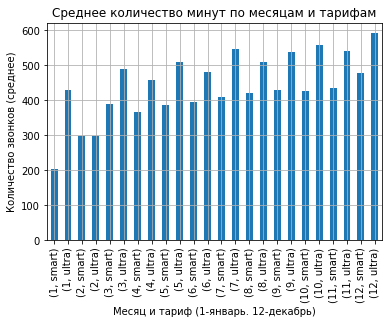

In [64]:
min_spent = final_table.pivot_table(index=['month', 'tariff'],
                                    values='minutes_spent',
                                    aggfunc=['sum', 'mean', 'var',
                                             lambda x: np.sqrt(np.var(x, ddof=1))]
                                   )
min_spent.columns = ['number_minutes', 'mean_minutes', 'var', 'sqrt']
min_spent.mean_minutes.plot.bar(title='Среднее количество минут по месяцам и тарифам', grid=True)
plt.xlabel('Месяц и тариф (1-январь. 12-декабрь)')
plt.ylabel('Количество звонков (среднее)')
plt.show()

In [65]:
min_spent

number_minutes  mean_minutes            var        sqrt
month tariff                                                         
1     smart           6931.0    203.852941   23787.341355  154.231454
      ultra           3853.0    428.111111   72769.361111  269.757968
2     smart          17324.0    298.689655   36412.287961  190.820041
      ultra           7131.0    297.125000   87919.679348  296.512528
3     smart          30034.0    390.051948   36823.155161  191.893604
      ultra          18117.0    489.648649  111384.900901  333.743765
4     smart          41119.0    367.133929   34778.207127  186.489161
      ultra          25191.0    458.018182   71653.870034  267.682405
5     smart          54618.0    387.361702   34820.061094  186.601343
      ultra          34192.0    510.328358   83870.193578  289.603511
6     smart          64885.0    395.640244   30742.918861  175.336587
      ultra          40295.0    479.702381   91535.946500  302.549081
7     smart          82079.0    408.353234   32250.269602  179.583601
      ultra          49667.0    545.791209   94322.278144  307.119322
8     smart          99045.0    421.468085   34793.583379  186.530382
      ultra          54653.0    510.775701   97956.496385  312.980026
9     smart         111439.0    428.611538   33535.342723  183.126576
      ultra          62036.0    539.443478  105716.775286  325.141162
10    smart         125284.0    426.136054   35392.336375  188.128510
      ultra          68644.0    558.081301  106464.583500  326.289110
11    smart         137544.0    435.265823   31605.237050  177.778618
      ultra          72545.0    541.380597   96570.057064  310.757232
12    smart         161275.0    478.560831   39698.622033  199.245131
      ultra          82400.0    592.805755  117276.331561  342.456321

In [66]:
final_table.groupby(['month', 'tariff']).minutes_spent.describe()

count        mean         std   min     25%    50%     75%  \
month tariff                                                               
1     smart    34.0  203.852941  154.231454   0.0   78.25  162.5  325.25   
      ultra     9.0  428.111111  269.757968  55.0  272.00  382.0  466.00   
2     smart    58.0  298.689655  190.820041   2.0  137.00  258.0  457.50   
      ultra    24.0  297.125000  296.512528   0.0   59.50  168.0  516.75   
3     smart    77.0  390.051948  191.893604  13.0  234.00  409.0  530.00   
      ultra    37.0  489.648649  333.743765  92.0  256.00  403.0  626.00   
4     smart   112.0  367.133929  186.489161   0.0  222.00  368.5  493.50   
      ultra    55.0  458.018182  267.682405   0.0  278.00  453.0  632.50   
5     smart   141.0  387.361702  186.601343   2.0  213.00  433.0  512.00   
      ultra    67.0  510.328358  289.603511   0.0  315.50  519.0  692.00   
6     smart   164.0  395.640244  175.336587   0.0  272.75  400.0  521.00   
      ultra    84.0  479.702381  302.549081   0.0  233.25  479.0  692.75   
7     smart   201.0  408.353234  179.583601   2.0  281.00  414.0  535.00   
      ultra    91.0  545.791209  307.119322   0.0  309.00  542.0  766.00   
8     smart   235.0  421.468085  186.530382   0.0  287.50  432.0  537.50   
      ultra   107.0  510.775701  312.980026   0.0  278.50  500.0  738.00   
9     smart   260.0  428.611538  183.126576   0.0  297.25  435.0  549.00   
      ultra   115.0  539.443478  325.141162   0.0  291.00  520.0  784.50   
10    smart   294.0  426.136054  188.128510   0.0  296.25  427.5  549.00   
      ultra   123.0  558.081301  326.289110   0.0  328.00  533.0  804.50   
11    smart   316.0  435.265823  177.778618   0.0  310.75  428.5  554.25   
      ultra   134.0  541.380597  310.757232   0.0  306.25  546.0  721.75   
12    smart   337.0  478.560831  199.245131   0.0  340.00  471.0  600.00   
      ultra   139.0  592.805755  342.456321   0.0  333.00  584.0  821.50   

                 max  
month tariff          
1     smart    551.0  
      ultra    861.0  
2     smart    747.0  
      ultra    919.0  
3     smart    822.0  
      ultra   1609.0  
4     smart    785.0  
      ultra   1096.0  
5     smart    820.0  
      ultra   1232.0  
6     smart    875.0  
      ultra   1410.0  
7     smart    839.0  
      ultra   1311.0  
8     smart   1000.0  
      ultra   1321.0  
9     smart    843.0  
      ultra   1297.0  
10    smart   1005.0  
      ultra   1401.0  
11    smart    954.0  
      ultra   1257.0  
12    smart   1435.0  
      ultra   1673.0

Визуализируем данные.

In [88]:
# считаем число проданных и вышедших игр по платформам
min_spent_plot = final_table.query('tariff == "smart"').groupby('month')[['minutes_spent']].mean().join(
    final_table.query('tariff == "ultra"').groupby('month')[['minutes_spent']].mean(), rsuffix='_')
min_spent_plot.columns = ['smart', 'ultra']


# создаем traces для визуализации
trace0 = go.Bar(
    x=min_spent_plot.index,
    y=min_spent_plot.smart,
    name='Тариф "СМАРТ"'
)

trace1 = go.Bar(
    x=min_spent_plot.index,
    y=min_spent_plot.ultra,
    name='Тариф "УЛЬТРА"'
)

# создаем массив с данными и задаем title для графика и оси x в layout
data = [trace0, trace1]
layout = {'title': 'Среднее количество минут в месяц на звонки(по тарифам) ',
          'yaxis': {'title': 'Количество минут (среднее)'},
          'xaxis': {'title': 'Месяц и тариф (1-январь, 12-декабрь)'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Из графика видно, что среднее значение по месяцам лидируют клиенты с тарифом "УЛЬТРА", но в одном месте, а точнее 2 месяц среднее наравне +-. Видимо после праздников небольшое затишье. Так же можно сказать, что клиенты с тарифом "УЛЬТРА" в среднем гораздо больше разговаривают, чем клиенты с тарифом "СМАРТ" и есть небольшая зависимость, что от начала года к концу постепенно идет рост минут на звонки. Зависимость с увеличением месяца нам доказывает корреляция.

In [68]:
smart = min_spent_plot.reset_index().smart.corr(min_spent_plot.reset_index().month)
ultra = min_spent_plot.reset_index().ultra.corr(min_spent_plot.reset_index().month)
display(f'{smart} - корреляция smart тарифа по звонкам', f'{ultra} - корреляция ultra тарифа по звонкам')

'0.8593862368649596 - корреляция smart тарифа по звонкам'

'0.8079309376661545 - корреляция ultra тарифа по звонкам'

### Посчитаем, сколько сообщений требуется пользователям каждого тарифа в месяц, среднее количество, дисперсию и стандартное отклонение. 

In [69]:
mess_spent = final_table.pivot_table(index=['month', 'tariff'],
                                    values='mess_count',
                                    aggfunc=['count', 'mean', 'var',
                                             lambda x: np.sqrt(np.var(x, ddof=1))]
                                   )
mess_spent.columns = ['mess_count', 'mess_mean', 'var', 'sqrt']
mess_spent

mess_count  mess_mean          var       sqrt
month tariff                                               
1     smart           34  18.235294   262.367201  16.197753
      ultra            9  33.777778   940.694444  30.670742
2     smart           58  24.086207   473.097701  21.750809
      ultra           24  21.958333   716.824275  26.773574
3     smart           77  31.857143   718.492481  26.804710
      ultra           37  32.297297  1732.381381  41.621886
4     smart          112  30.741071   602.139559  24.538532
      ultra           55  31.563636  1407.287542  37.513831
5     smart          141  33.773050   730.990983  27.036845
      ultra           67  37.850746  1624.644052  40.306874
6     smart          164  33.402439   806.806374  28.404337
      ultra           84  41.726190  1986.297619  44.567899
7     smart          201  33.751244   799.887811  28.282288
      ultra           91  49.846154  2372.042735  48.703621
8     smart          235  33.638298   838.257501  28.952677
      ultra          107  48.439252  2171.739199  46.601923
9     smart          260  33.638462   790.617820  28.117927
      ultra          115  52.286957  2152.855530  46.398874
10    smart          294  33.765306   816.111966  28.567673
      ultra          123  58.430894  2697.181661  51.934398
11    smart          316  34.075949   805.937071  28.389031
      ultra          134  55.791045  2476.948491  49.768951
12    smart          337  35.994065   934.952346  30.576990
      ultra          139  60.611511  2681.978417  51.787821

In [89]:
mess_spent_plot = final_table.query('tariff == "smart"').groupby('month')[['mess_count']].mean().join(
    final_table.query('tariff == "ultra"').groupby('month')[['mess_count']].mean(), rsuffix='_')
mess_spent_plot.columns = ['smart', 'ultra']


trace0 = go.Bar(
    x=mess_spent_plot.index,
    y=mess_spent_plot.smart,
    name='Тариф "СМАРТ"'
)

trace1 = go.Bar(
    x=mess_spent_plot.index,
    y=mess_spent_plot.ultra,
    name='Тариф "УЛЬТРА"'
)

data = [trace0, trace1]
layout = {'title': 'Среднее количество смс в месяц (по тарифам) ',
          'yaxis': {'title': 'Количество смс (среднее)'},
          'xaxis': {'title': 'Месяц и тариф (1-январь, 12-декабрь)'}}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [71]:
smart = mess_spent_plot.reset_index().smart.corr(mess_spent_plot.reset_index().month)
ultra = mess_spent_plot.reset_index().ultra.corr(mess_spent_plot.reset_index().month)
display(f'{smart} - корреляция smart тарифа по смс', f'{ultra} - корреляция ultra тарифа по смсmess_spent_plot')

'0.7733011109934177 - корреляция smart тарифа по смс'

'0.9476272073404977 - корреляция ultra тарифа по смсmess_spent_plot'

По этой таблице я могу сказать тоже самое, что и там, а точнее:
- В тарифе "УЛЬТРА" клиенты в среднем больше отправляют смс, чем в "СМАРТ"
- У тарифа "УЛЬТРА" от начала года к концу идет рост среднего по количеству отправленных смс, а вот у "СМАРТ" начиная с 3 месяца почти до конца года все одинакого.

### Опишем поведение клиентов оператора, исходя из выборки.

In [72]:
inet_spent = final_table.pivot_table(index=['month', 'tariff'],
                                    values='sum_mb',
                                    aggfunc=['sum', 'mean', 'var',
                                             lambda x: np.sqrt(np.var(x, ddof=1))]
                                   )
inet_spent.columns = ['sum_count', 'mb_mean', 'var', 'sqrt']
inet_spent

sum_count       mb_mean           var          sqrt
month tariff                                                     
1     smart    289831.0   8524.441176  4.162621e+07   6451.837940
      ultra    118382.0  13153.555556  4.722641e+07   6872.147046
2     smart    673461.0  11611.396552  3.911935e+07   6254.546293
      ultra    282887.0  11786.958333  1.135150e+08  10654.343346
3     smart   1164537.0  15123.857143  3.405260e+07   5835.460138
      ultra    649423.0  17551.972973  1.201640e+08  10961.936316
4     smart   1509702.0  13479.482143  3.254736e+07   5705.029114
      ultra    926409.0  16843.800000  9.462393e+07   9727.483304
5     smart   2231353.0  15825.198582  3.582236e+07   5985.177978
      ultra   1298540.0  19381.194030  1.011158e+08  10055.634106
6     smart   2593622.0  15814.768293  3.361642e+07   5797.966469
      ultra   1591148.0  18942.238095  8.652248e+07   9301.745817
7     smart   3168466.0  15763.512438  3.486110e+07   5904.328642
      ultra   1866833.0  20514.648352  1.014776e+08  10073.606689
8     smart   3908561.0  16632.174468  3.136352e+07   5600.314007
      ultra   2096565.0  19594.065421  1.099560e+08  10485.992263
9     smart   4244377.0  16324.526923  2.706215e+07   5202.129029
      ultra   2210554.0  19222.208696  9.014880e+07   9494.672266
10    smart   4932898.0  16778.564626  3.441711e+07   5866.609964
      ultra   2467856.0  20063.869919  9.627171e+07   9811.814618
11    smart   5345940.0  16917.531646  2.858852e+07   5346.823769
      ultra   2653912.0  19805.313433  9.834044e+07   9916.674617
12    smart   6112113.0  18136.833828  3.114083e+07   5580.397230
      ultra   3032089.0  21813.589928  1.079051e+08  10387.738720

In [90]:
inet_spent_plot = final_table.query('tariff == "smart"').groupby('month')[['sum_mb']].mean().join(
    final_table.query('tariff == "ultra"').groupby('month')[['sum_mb']].mean(), rsuffix='_')
inet_spent_plot.columns = ['smart', 'ultra']


trace0 = go.Bar(
    x=inet_spent_plot.index,
    y=inet_spent_plot.smart,
    name='Тариф "СМАРТ"'
)

trace1 = go.Bar(
    x=inet_spent_plot.index,
    y=inet_spent_plot.ultra,
    name='Тариф "УЛЬТРА"'
)

data = [trace0, trace1]
layout = {'title': 'Среднее количество мегабайт в месяц (по тарифам) ',
          'yaxis': {'title': 'Количество мегабайт (среднее)'},
          'xaxis': {'title': 'Месяц и тариф (1-январь, 12-декабрь)'}}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [74]:
smart = inet_spent_plot.reset_index().smart.corr(inet_spent_plot.reset_index().month)
ultra = inet_spent_plot.reset_index().ultra.corr(inet_spent_plot.reset_index().month)
display(f'{smart} - корреляция smart тарифа по мегабайтам', f'{ultra} - корреляция ultra тарифа по мегабайтам')

'0.8562610227136386 - корреляция smart тарифа по мегабайтам'

'0.8399196921887301 - корреляция ultra тарифа по мегабайтам'

Видим лидирование клиентов с тарифом "УЛЬТРА, и то что у обоих тарифов сначала и к концу года возрастает потребление интернета.

# Вывод
Видим на всех 3-ех таблицах, что лидируют клиенты с тарифом "УЛЬТРА". Больше всех используют-тратят.
Рост у другого тарифа тоже наблюдается по тратам тарифа, но вот смс эти клиенты отправляют не так много.

In [91]:
platforms_df = final_table.query('tariff == "smart"').groupby('month')[['sum_mb']].agg(['mean',
                                                                         'var',
                                                                         lambda x: np.sqrt(
                                                                         np.var(x, ddof=1))]).join(
    final_table.query('tariff == "ultra"').groupby('month')[['sum_mb']].agg(['mean',
                                                                         'var',
                                                                         lambda x: np.sqrt(
                                                                         np.var(x, ddof=1))]),
                                                                         rsuffix='_right')
platforms_df.columns = ['smart', 'smart_var', 'smart_sqrt', 'ultra', 'ultra_var', 'ultra_sqrt']

trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.smart,
    name='Тариф "СМАРТ"'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.ultra,
    name='Тариф "УЛЬТРА"'
)

trace2 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.smart_var,
    name='Дисперсия тарифа "СМАРТ"'
)

trace3 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.ultra_var,
    name='Дисперсия тарифа "УЛЬТРА"'
)

trace4 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.smart_sqrt,
    name='Std тарифа "СМАРТ"'
)

trace5 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.ultra_sqrt,
    name='Std тарифа "УЛЬТРА"'
)

data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = {'title': 'Среднее количество мегабайт в месяц (по тарифам) ',
          'yaxis': {'title': 'Количество мегабайт (среднее)'},
          'xaxis': {'title': 'Месяц и тариф (1-январь, 12-декабрь)'}}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Сделаем график распределения среднего по тарифам.

In [92]:
platforms_final = final_table.pivot_table(index=['tariff'], values=['minutes_spent',
                                                  'mess_count',
                                                  'sum_mb',
                                                  'all_rub'], aggfunc={'minutes_spent': 'mean',
                                                                       'mess_count': 'mean',
                                                                       'sum_mb': 'mean',
                                                                       'all_rub': 'median'})
trace0 = go.Bar(
    x=platforms_final.index,
    y=platforms_final.all_rub,
    name ='Средняя выручка (руб)'
)

trace1 = go.Bar(
    x=platforms_final.index,
    y=platforms_final.minutes_spent,
    name ='Среднее в минутах по звонкам (минутах)'
)

trace2 = go.Bar(
    x=platforms_final.index,
    y=platforms_final.mess_count,
    name ='Среднее по смс (шт)'
)

trace3 = go.Bar(
    x=platforms_final.index,
    y=platforms_final.sum_mb,
    name ='Среднее в Мб'
)


data = [trace0, trace1, trace2, trace3]
layout = {'title': 'Среднее количество потребления по тарифам ',
          'yaxis': {'title': 'Количество среднее'},
          'xaxis': {'title': 'Тариф'}}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)
rate

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


По гистограмме можно убедиться о среднем распределении нашего графика выше по разделам и увидеть редких клиентов.

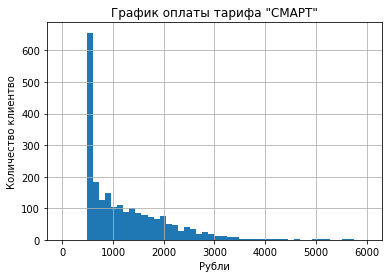

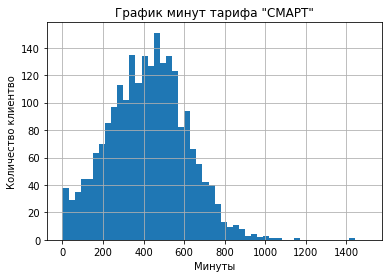

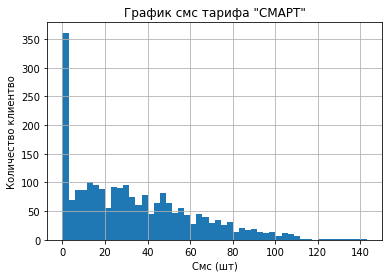

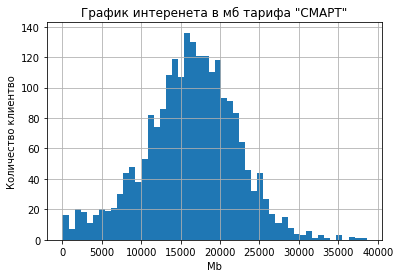

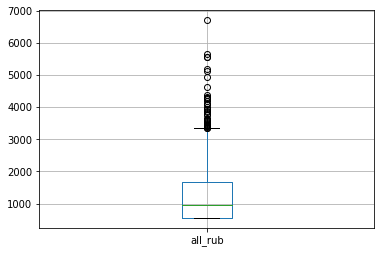

In [93]:
ax = final_table.query('tariff == "smart"').all_rub.plot.hist(bins=50, 
                                                         title='График оплаты тарифа "СМАРТ"',
                                                         grid=True,
                                                         range=(0, 6000))
ax.set_xlabel('Рубли')
ax.set_ylabel('Количество клиентво')
plt.show()

ax = final_table.query('tariff == "smart"').minutes_spent.plot.hist(bins=50, 
                                                         title='График минут тарифа "СМАРТ"',
                                                         grid=True,
                                                         range=(0, 1500))
ax.set_xlabel('Минуты')
ax.set_ylabel('Количество клиентво')
plt.show()

ax = final_table.query('tariff == "smart"').mess_count.plot.hist(bins=50, 
                                                         title='График смс тарифа "СМАРТ"',
                                                         grid=True,
                                                         )
ax.set_xlabel('Смс (шт)')
ax.set_ylabel('Количество клиентво')
plt.show()

ax = final_table.query('tariff == "smart"').sum_mb.plot.hist(bins=50, 
                                                         title='График интеренета в мб тарифа "СМАРТ"',
                                                         grid=True,
                                                         )
ax.set_xlabel('Mb')
ax.set_ylabel('Количество клиентво')
plt.show()

final_table.query('tariff == "smart"').boxplot('all_rub')

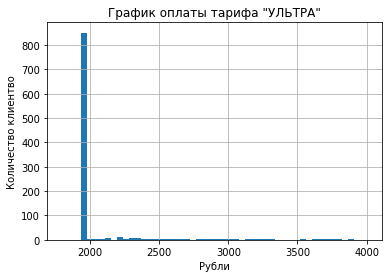

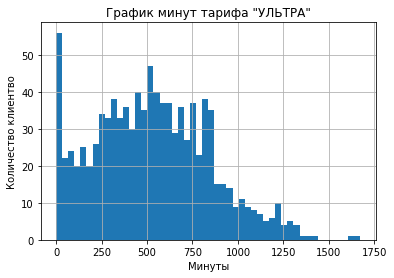

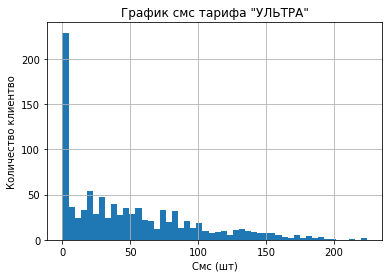

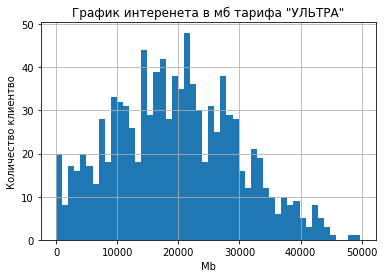

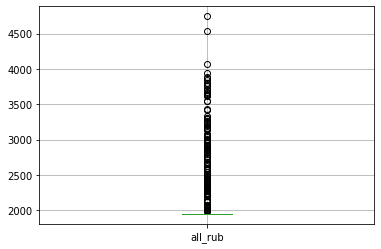

In [78]:
ax = final_table.query('tariff == "ultra"').all_rub.plot.hist(bins=50, 
                                                         title='График оплаты тарифа "УЛЬТРА"',
                                                         grid=True,
                                                         range=(1800, 4000))
ax.set_xlabel('Рубли')
ax.set_ylabel('Количество клиентво')
plt.show()

ax = final_table.query('tariff == "ultra"').minutes_spent.plot.hist(bins=50, 
                                                         title='График минут тарифа "УЛЬТРА"',
                                                         grid=True,
                                                         )
ax.set_xlabel('Минуты')
ax.set_ylabel('Количество клиентво')
plt.show()

ax = final_table.query('tariff == "ultra"').mess_count.plot.hist(bins=50, 
                                                         title='График смс тарифа "УЛЬТРА"',
                                                         grid=True,
                                                         )
ax.set_xlabel('Смс (шт)')
ax.set_ylabel('Количество клиентво')
plt.show()

ax = final_table.query('tariff == "ultra"').sum_mb.plot.hist(bins=50, 
                                                         title='График интеренета в мб тарифа "УЛЬТРА"',
                                                         grid=True,
                                                         )
ax.set_xlabel('Mb')
ax.set_ylabel('Количество клиентво')
plt.show()

final_table.query('tariff == "ultra"').boxplot('all_rub')

# Вывод

Сделал средний подсчет выручки по тарифам и среднее потребление по лимитам (попровка: рассчет выручки сделал по медиане т.к. выше я привел доказательства выбросов, а медиана устойчива к выбросам).

Все утверждения в среднем!
На графике видно, что тариф "УЛЬТРА" укладывается в лимит по минутам, смс и мб. Оплата у большенства клиентов не выходит за предел тарифа. Совсем другое у клиентов "СМАРТ", там потребление смс и звонков в среднем укладывается, а вот интернета этим клиентам требуется больше, тем самым они переплачивают за него и не укладываются в лимит тарифа, переплачивают.

## Проверим гипотезы

1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Добавим города в финальную таблицу.

In [79]:
final_table = final_table.set_index('user_id').join(user.set_index('user_id')['city'])

Делаем категоризацию для второй гипотезы.

In [80]:
final_table['city_gategor'] = final_table['city'].where(final_table['city'] == 'Москва', 'Регион')

In [81]:
alpha = 0.05

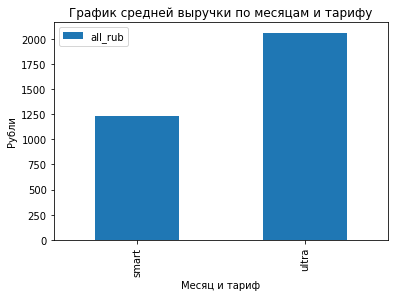

In [82]:
final_table.pivot_table(index='tariff', values='all_rub').plot.bar(
    title='График средней выручки по месяцам и тарифу')
plt.xlabel('Месяц и тариф')
plt.ylabel('Рубли')
plt.show()

Видно, что средняя выручка по тарифам различается значит можно сказать, что средняя выручка пользователей тарифов "УТЬТРА" и "СМАРТ" различается. Проверим нашу гипотезу.

### Проверка гипотезы. 
# Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Нулевая гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются.  
Альтернативаня гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

In [83]:
sample_smart = final_table.query('tariff == "smart"').all_rub
sample_ultra = final_table.query('tariff == "ultra"').all_rub
results = st.ttest_ind(sample_smart, sample_ultra)
print(f'p-value {results.pvalue}')

if results.pvalue < alpha:
    print(f'Отвергаем нулевую гипотезу')
else:
    print(f'Не получилось отвергнуть нулевую гипотезу')

p-value 1.172655564462924e-190
Отвергаем нулевую гипотезу


Сделаем на случайной выборке.

In [84]:
sample_1 = list(final_table.query('tariff == "smart"')['all_rub'])
sample_2 = list(final_table.query('tariff == "ultra"')['all_rub'])

In [85]:
sample_1 = random.sample(sample_1,30)
sample_2 = random.sample(sample_2,30)

results = st.ttest_ind(sample_1, sample_2)
print(f'p-value {results.pvalue}')

if results.pvalue < alpha:
    print(f'Отвергаем нулевую гипотезу')
else:
    print(f'Не получилось отвергнуть нулевую гипотезу')

p-value 7.184948389108426e-07
Отвергаем нулевую гипотезу


То, что мы получили, мы не утверждаем, что та или иная гипотеза верна, мы говорим, что отвергаем нулевую гипотезу в связи со значением п-значения. У нас п-значение меньше, значит отвергаем нулевую гипотезу и говорим, что значения отличаются и это видно на графике который был выше.

### Проверка гипотезы.  
# Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нулевая гипотеза - средняя выручка пользователей из Москвы и выручка пользователей из других регионов не различаются.  
Альтернативаня гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [86]:
sample_moscow = final_table.query('city == "Москва"').all_rub
sample_region = final_table.query('city != "Москва"').all_rub
results = st.ttest_ind(sample_moscow, sample_region)
print(f'p-value {results.pvalue}')

if results.pvalue < alpha:
    print(f'Отвергаем нулевую гипотезу')
else:
    print(f'Не получилось отвергнуть нулевую гипотезу')

p-value 0.47443187631524797
Не получилось отвергнуть нулевую гипотезу


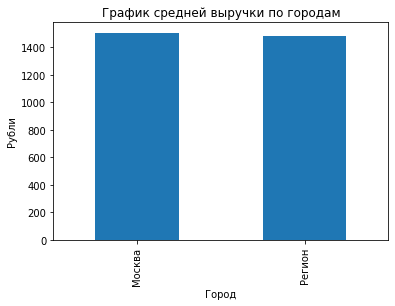

city_gategor
Москва    1507.276762
Регион    1482.063727
Name: all_rub, dtype: float64

In [87]:
final_table.groupby('city_gategor')['all_rub'].mean().plot.bar(
    title='График средней выручки по городам')
plt.xlabel('Город')
plt.ylabel('Рубли')
plt.show()
final_table.groupby('city_gategor')['all_rub'].mean()

Провели гипотезу которая показала, что нулевая гипотеза верна, от сюда делаем вывод, что средняя выручка в Москве и других регионов не отличается. Это видно на графике выше (распределение дохода по медиане).

# Общий вывод

1. Прочитали все таблицы, сохранили в пременные и изучили их.
2. Сделали предобработку данных.
    - Заменили пустые значения.
    - Поменяли тип данных.
    - Убрали столбец.
3. Подсчитатли для каждого пользователя:
    - Количество сделанных звонков и израсходованных минут
    - Количество отправленных смс
    - Объем трафика
    - Помесячную выручку 
4. Проанализировали данные:
    - Сколько минут требуется пользователям каждого тарифа помесячно.
    - Сколько смс требуется пользователям каждого тарифа помесячно.
    - Объем трафика помесячно для каждого пользователя.
5. Проанализировали гипотезы.
    - Есть ли различие по выручке по тарифам?
    - Есть ли различие по выручке в Москве и других регионах?
        - В обоих случах мы получили отвержение гипотиз, т.к. среднее отличается по графику.


- Вывод:

- В общем и целом, в среднем пользователи тарифа "СМАРТ" расходают больше интернета, чем им позволяет тариф тем самым они переплачивают за месяц его использования. Что касается звонком и смс они в среднем укладываются в планки установленными тарифом. Клиенты тарифа "УЛЬТРА" в среднем платят по тарифу столько как прописанно в палне. Они укладываеюся по звонкам, смс и интернету в среднем.
- Тариф "УЛЬТРА" лучше, т.к. приносит в среднем больше дохода, чем тарифа "СМАРТ"
- Клинты из Москвы приносят больше прибыли в среднем, чем из других регионов.